In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
%matplotlib widget

In [2]:
wave_no = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')
scan_48 = pd.read_csv('../mdi_optimization/cleaned_csvs/48_scans.csv').drop(columns=['wave_no'])
kgy5_sn48 = pd.read_csv('5kgy/5kgy_sn48.csv')
kgy10_sn48 = pd.read_csv('10kgy/10kgy_sn48.csv')


for df in [scan_48, kgy5_sn48, kgy10_sn48]:
    df['average'] = df.iloc[:,:].mean(axis=1)

def trans(abs):
    data = ((10 ** -abs) * 100)
    return data

In [29]:
def annotator(ax):

    # amide A
    ax.axvspan(3300, 3300, color="#c7e9c0")
    ax.text(3315, 80, "Amide A", rotation=90, fontsize=7)

    # amide B
    ax.axvspan(3100, 3100, color="#edf8e9")
    ax.text(3115, 80, "Amide B", rotation=90, fontsize=7)

    # #amide 1
    ax.axvspan(1600, 1690, color="#006d2c", alpha=0.55)
    ax.text(1655, 80, "Amide I", rotation=90, fontsize=7)

    # amide 2
    ax.axvspan(1480, 1575, color="#31a354", alpha=0.55)
    ax.text(1535, 80, "Amide II", rotation=90, fontsize=7)

    # amide 3
    ax.axvspan(1229, 1301, color="#74c476", alpha=0.55)
    ax.text(1275, 80, "Amide III", rotation=90, fontsize=7)

    # amide 4
    ax.axvspan(625, 767, color="#a1d99b", alpha=0.55)
    ax.text(710, 80, "Amide IV", rotation=90, fontsize=7)

    # # amide 5
    # ax.axvspan(640, 800, color="#f800a4", alpha=0.3)
    # ax.text(625, 83, "Amide V", rotation=90, fontsize=7)

    # # amide 6
    # ax.axvspan(537, 606, color="#f800a4", alpha=0.3)
    # ax.text(555, 83, "Amide VI", rotation=90, fontsize=7)

    # # amide 7
    # ax.axvspan(200, 200, color="#f800a4", alpha=0.3)
    # ax.text(185, 83, "Amide VII", rotation=90, fontsize=7)

    # source: https://sci-hub.se/https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1745-7270.2007.00320.x

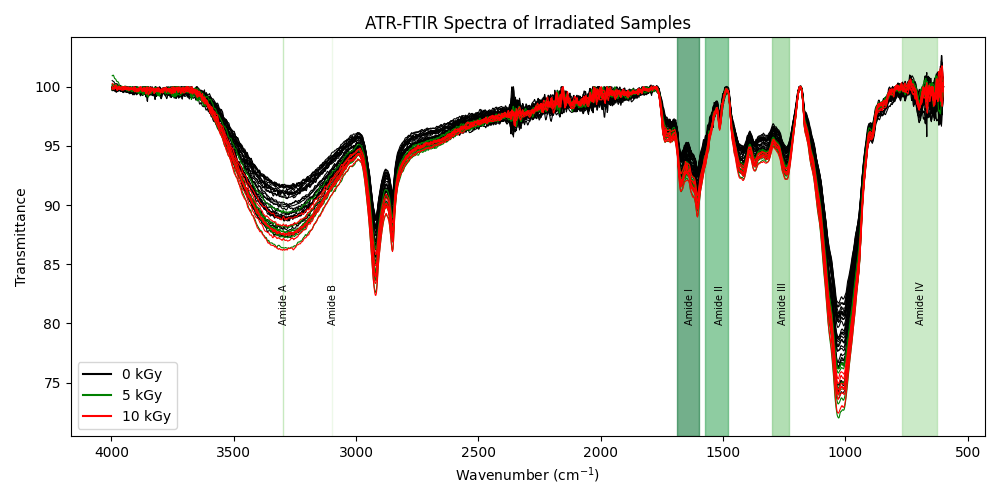

In [30]:
plt.close('all')
irrad_comp, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy', '5 kGy', '10 kGy']
data = [scan_48, kgy5_sn48, kgy10_sn48]

for color, df in zip(colors, data):
    for sample in df.columns:
        axis.plot(wave_no, trans(df[sample]), color=color, linewidth=0.8)

for color, label in zip(colors, labels):
    axis.plot([],[], color=color, label=label)

annotator(axis)
axis.invert_xaxis()
axis.set(title='ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')


axis.legend()
irrad_comp.tight_layout()

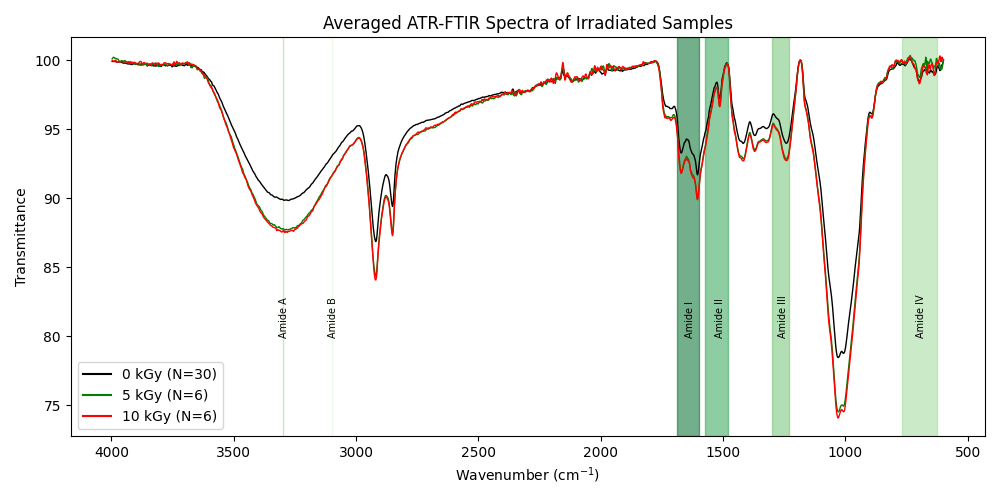

In [31]:
plt.close('all')
irrad_ave, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy (N=30)', '5 kGy (N=6)', '10 kGy (N=6)']
data = [trans(df['average']) for df in [scan_48, kgy5_sn48, kgy10_sn48]]

for color, label, ave in zip(colors, labels, data):
    axis.plot([],[], color=color, label=label)
    axis.plot(wave_no, ave, color=color, linewidth=1)

axis.set(title='Averaged ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

annotator(axis)
axis.invert_xaxis()

axis.legend()
irrad_ave.tight_layout()